<a href="https://colab.research.google.com/github/keshsri/machine-learning/blob/main/Rock_Paper_Scissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip

!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip

--2023-09-07 19:16:26--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.130.207, 74.125.68.207, 64.233.170.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.130.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip’

rps.zip             100%[===================>] 191.38M  23.5MB/s    in 9.6s    

2023-09-07 19:16:35 (19.9 MB/s) - ‘rps.zip’ saved [200682221/200682221]

--2023-09-07 19:16:36--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.130.207, 74.125.68.207, 64.233.170.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.130.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘rps-test-set.

In [2]:
import zipfile

local_zip = './rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/rps-train')

local_zip = './rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/rps-test')

zip_ref.close()

In [3]:
import os

base_dir = 'tmp/rps-train/rps'

rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

print(len(os.listdir(rock_dir)))
print(len(os.listdir(paper_dir)))
print(len(os.listdir(scissors_dir)))

840
840
840


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = 'tmp/rps-train/rps'
validation_dir = 'tmp/rps-test/rps-test-set'

train_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=126,
    class_mode='categorical'
)

validation_datagen = ImageDataGenerator(rescale=1./255.)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    class_mode='categorical',
    batch_size=126
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [5]:
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [6]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
history = model.fit(
    train_generator,
    validation_data = validation_generator,
    steps_per_epoch=20,
    epochs=25,
    validation_steps=3,
    verbose=1
)

Epoch 1/25
20/20 [==============================] - 35s 1s/step - loss: 1.1241 - accuracy: 0.3448 - val_loss: 1.0932 - val_accuracy: 0.5027
Epoch 2/25
20/20 [==============================] - 23s 1s/step - loss: 1.1017 - accuracy: 0.3794 - val_loss: 1.0874 - val_accuracy: 0.4516
Epoch 3/25
20/20 [==============================] - 24s 1s/step - loss: 1.0570 - accuracy: 0.4575 - val_loss: 0.8456 - val_accuracy: 0.5941
Epoch 4/25
20/20 [==============================] - 23s 1s/step - loss: 0.8952 - accuracy: 0.5667 - val_loss: 0.7089 - val_accuracy: 0.6371
Epoch 5/25
20/20 [==============================] - 21s 1s/step - loss: 0.8420 - accuracy: 0.6040 - val_loss: 0.6084 - val_accuracy: 0.6667
Epoch 6/25
20/20 [==============================] - 23s 1s/step - loss: 0.7274 - accuracy: 0.6782 - val_loss: 0.9790 - val_accuracy: 0.4516
Epoch 7/25
20/20 [==============================] - 22s 1s/step - loss: 0.6568 - accuracy: 0.7111 - val_loss: 0.2507 - val_accuracy: 0.9409
Epoch 8/25
20/20 [==

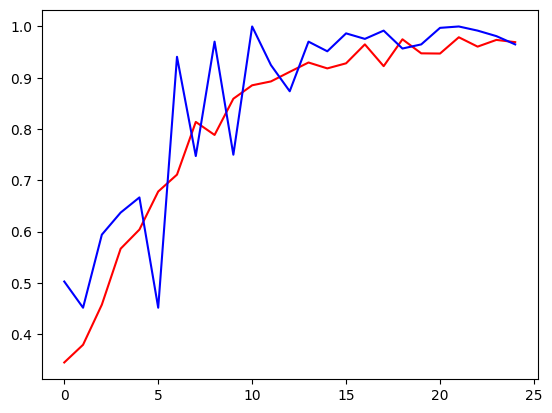

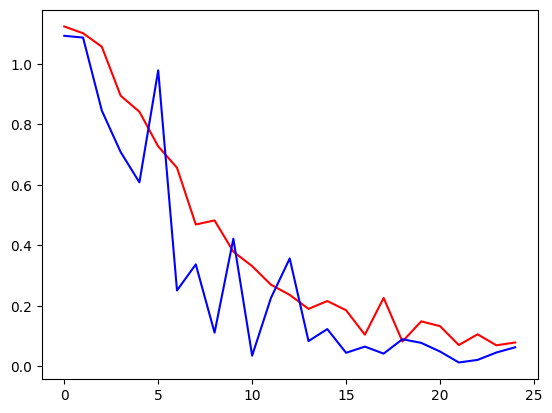

In [9]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.show()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.show()
